In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
def msh_distr_xdir(kpoints,a,c,L,H):
    nelem = 1000
    x = np.zeros(nelem+1)
    xs = x
    for i in range(0,nelem+1):
        fact = i/nelem
        x[i] = H*((np.tanh(a*(fact/L-0.5))+1.)/2.)+c*fact
    for i in range(0,nelem+1):
        xs[i] = (x[i]-x[0])/(x[nelem]-x[0])
    f = interp1d(xs, np.linspace(0,1,nelem+1), kind='cubic')
    yint = np.linspace(0,1,kpoints+1)
    return f(yint)

def get_infl_pt(a,c,L,H):
    nelem = 1000
    x = np.zeros(nelem+1)
    xs = x
    for i in range(0,nelem+1):
        fact = i/nelem
        x[i] = H*((np.tanh(a*(fact/L-0.5))+1.)/2.)+c*fact
    for i in range(0,nelem+1):
        xs[i] = (x[i]-x[0])/(x[nelem]-x[0])
    f = interp1d(xs, np.linspace(0,1,nelem+1))
    return f(H)

def msh_distr_ydir(ipoints, fA, fB):
    y = np.zeros(ipoints+1)
    for i in range(0,ipoints+1):
        fact       = i/(ipoints-1)
        y[i] = (1.-np.tanh(fB*(fA-fact))/np.tanh(fA*fB))
        y[i] = y[i]/(1.-np.tanh(fB*(fA-1.))/np.tanh(fA*fB))
    return y

In [3]:
kpoints = 200
ipoints = 100
a = 10.
L = 0.1
c = 0.8
H = 0.1
LoD = 200
xdis=msh_distr_xdir(kpoints,a,c,L,H)*LoD
ydis=msh_distr_ydir(ipoints,.12,2.4)
print(get_infl_pt(a,c,L,H)*LoD)

10.0


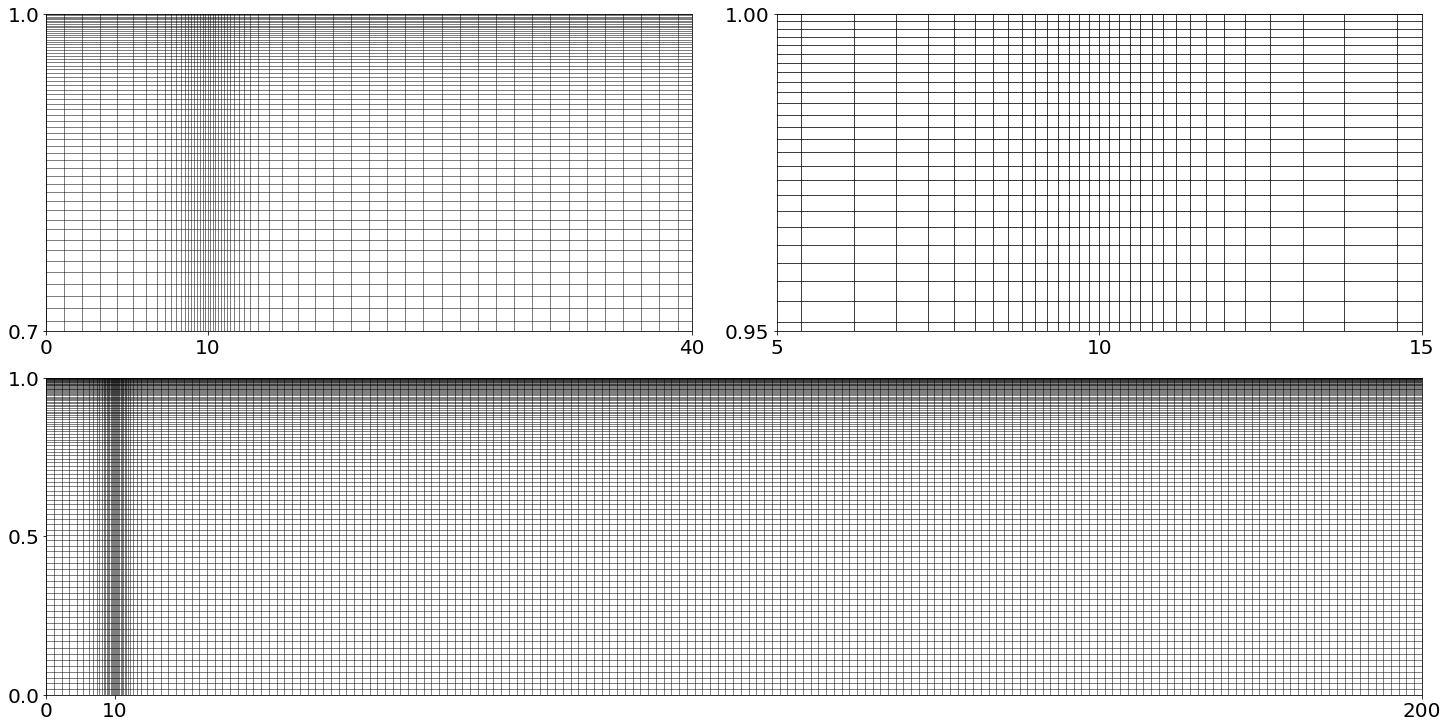

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(20,10))
gs = gridspec.GridSpec(2, 2, figure=fig)
ax = plt.subplot(gs[1, :]) 
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

for x in xdis:
    ax.plot(np.ones(ipoints+1)*x, ydis, color = 'k', linewidth=0.5)
    ax1.plot(np.ones(ipoints+1)*x, ydis, color = 'k', linewidth=0.5)
    ax2.plot(np.ones(ipoints+1)*x, ydis, color = 'k', linewidth=0.75)
        
for y in ydis:
    ax.plot(xdis,np.ones(kpoints+1)*y, color='k', linewidth=0.5)
    ax1.plot(xdis,np.ones(kpoints+1)*y, color='k', linewidth=0.5)
    ax2.plot(xdis,np.ones(kpoints+1)*y, color='k', linewidth=0.75)

ax.set_xbound(0,LoD)
ax.set_ybound(0,1)
ax1.set_xbound(0, 2*L*LoD)
ax1.set_ybound(0.7,1)
ax2.set_xbound(0.25*L*LoD,0.75*L*LoD)
ax2.set_ybound(0.95, 1.)
ax.set_xticks([0,0.05*LoD,LoD])
ax.set_yticks([0,0.5,1])
ax.tick_params(labelsize=20)

ax1.set_xticks([0,0.05*LoD,2*L*LoD])
ax1.set_yticks([0.7,1])
ax1.tick_params(labelsize=20)

ax2.set_xticks([0.25*L*LoD,0.05*LoD,0.75*L*LoD])
ax2.set_yticks([0.95,1])
ax2.tick_params(labelsize=20)

# ax.set_axis_off()
# ax1.set_axis_off()
# ax2.set_axis_off()
fig.savefig("non-equidistant.eps", format='eps', dpi=1000)
fig.savefig("non-equidistant.svg", format='svg', dpi=1000)